#### This is a very simple Logistic Regression Model I built in order to predict whether or not a candy contained chocolate or not, based on other features of the candy.

## Imports and Data Loading

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('candy-data.csv', index_col=False)
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## Examine Class (Chocolate vs. non-Chocolate) Distribution

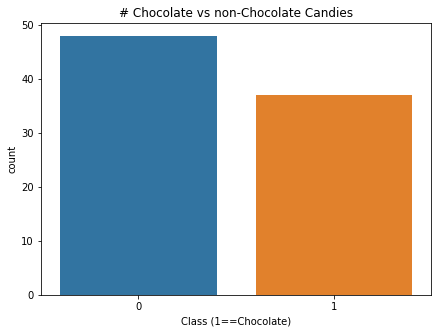

In [3]:
f, ax = plt.subplots(figsize=(7, 5))

sns.countplot(x='chocolate', data=df)
_ = plt.title('# Chocolate vs non-Chocolate Candies')
_ = plt.xlabel('Class (1==Chocolate)')

### It is evident that our classes are slightly imbalanced - there are more non-chocolate candies than chocolate candies in our data set.

In [4]:
X = df.drop(columns=['chocolate', 'competitorname'], axis=1)
y = df.chocolate.values

## Check for multicollinearity amongst continuous independent variables

In [5]:
X.iloc[:, -3:].corr()

,sugarpercent,pricepercent,winpercent
sugarpercent,1.000000,0.329706,0.229151
pricepercent,0.329706,1.000000,0.345325
winpercent,0.229151,0.345325,1.000000


### There is no need to scale the data as all three independent continous variables are already on the same scale. 

In [6]:
np.random.seed(47)
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Train and Score the Model 

In [7]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_proba = lr.predict_proba(X_test)[:, 1]

train_accuracy = accuracy_score(y_test, y_pred)*100
train_auc_roc = roc_auc_score(y_test, y_pred_proba)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Training accuracy: %.2f %%' % train_accuracy)
print('Training AUC: %.2f %%' % train_auc_roc)

Confusion matrix:
 [[11  0]
 [ 2  9]]
Training accuracy: 90.91 %
Training AUC: 94.21 %


#### I used all available independent variables with the exception of 'competitorname' as it is unique to each candy and therefore meaningless. I used the 'liblinear' solver due to the small nature of this dataset.

#### The confusion matrix shows that only 2 chocolate candies were mis-identified as non-Chocolate and the solver correctly identified all non-chocolate candies! This is perfect Precision with slightly lower Recall for identifying chocolate candies as 'positive'.

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.82      0.90        11

    accuracy                           0.91        22
   macro avg       0.92      0.91      0.91        22
weighted avg       0.92      0.91      0.91        22



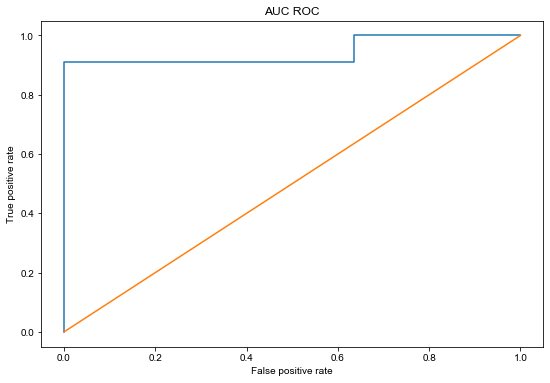

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, drop_intermediate=True)

f, ax = plt.subplots(figsize=(9, 6))
_ = plt.plot(fpr, tpr, [0,1], [0, 1])
_ = plt.title('AUC ROC')
_ = plt.xlabel('False positive rate')
_ = plt.ylabel('True positive rate')
plt.style.use('seaborn')

plt.savefig('auc_roc.png', dpi=600)